Hasna Nisrina Sumayyah

Analytics and Data Science Batch 11

Project Probability

In [1]:
import pandas as pd
import numpy as np
from numpy import cov
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("insurance.csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [2]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Langkah 1 - Analisa Descriptive Statistic

In [3]:
#Berapa rata rata umur pada data tersebut?
df["age"].mean()

39.20702541106129

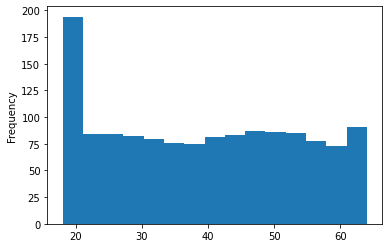

In [4]:
df['age'].plot(kind='hist', bins=15)

In [5]:
#BMI mana yang lebih tinggi, seseorang perokok atau non perokok
df.groupby('smoker')['bmi'].mean()

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

In [6]:
#BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?
df.groupby('sex')['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

In [7]:
#Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?
df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [8]:
#Apakah variansi dari data charges perokok dan non perokok sama?
df.groupby('smoker')['charges'].var()

smoker
no     3.592542e+07
yes    1.332073e+08
Name: charges, dtype: float64

Langkah 2 - Analisa Variabel Kategorik (PMF)

In [9]:
#Gender mana yang memiliki tagihan paling tinggi?
df.groupby(['sex'])['charges'].max()

sex
female    63770.42801
male      62592.87309
Name: charges, dtype: float64

In [10]:
#Distribusi peluang tagihan di tiap-tiap region
df.groupby(['region']).agg(['count']).reset_index()

,region,age,sex,bmi,children,smoker,charges
,,count,count,count,count,count,count
0,northeast,324,324,324,324,324,324
1,northwest,325,325,325,325,325,325
2,southeast,364,364,364,364,364,364
3,southwest,325,325,325,325,325,325


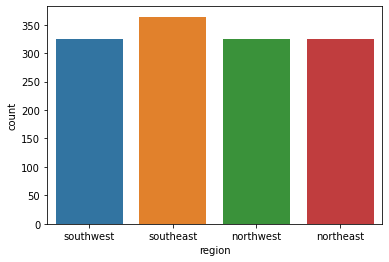

In [11]:
sns.countplot(x=df['region'])

In [12]:
total= 324+325+364+325
p_northeast = round((324/total*100),2)
p_northwest = round((325/total*100),2)
p_southeast = round((364/total*100),2)
p_southwest = round((325/total*100),2)

print("peluang northeast: ", p_northeast, '%' )
print("peluang northwest: ", p_northwest, '%' )
print("peluang southeast: ", p_southeast, '%' )
print("peluang southwest: ", p_southwest, '%' )

peluang northeast:  24.22 %
peluang northwest:  24.29 %
peluang southeast:  27.2 %
peluang southwest:  24.29 %


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03a372f370>,
      dtype=object)

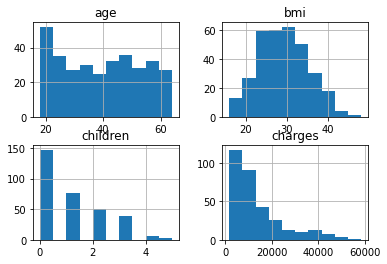

In [13]:
df[df['region']=='northeast'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03a3569b80>,
      dtype=object)

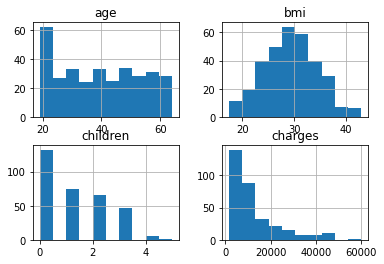

In [14]:
df[df['region']=='northwest'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03a344da30>,
      dtype=object)

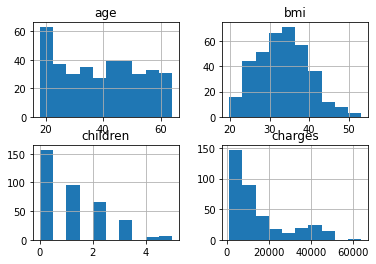

In [15]:
df[df['region']=='southeast'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03a32caa00>,
      dtype=object)

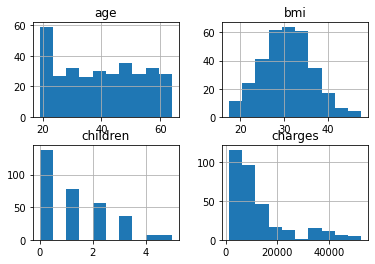

In [16]:
df[df['region']=='southwest'].hist()

In [17]:
#Mana yang lebih tinggi proporsi perokok atau non perokok?
df.groupby(['smoker']).agg(['count']).reset_index()

,smoker,age,sex,bmi,children,region,charges
,,count,count,count,count,count,count
0,no,1064,1064,1064,1064,1064,1064
1,yes,274,274,274,274,274,274


In [18]:
total= 1064+274
smoker = 274
non_smoker = 1064
p_s = round((smoker/total*100),2)
p_ns = round((non_smoker/total*100),2)

print("peluang perokok: ", p_s, "%")
print("peluang non perokok: ", p_ns, "%")

peluang perokok:  20.48 %
peluang non perokok:  79.52 %


In [19]:
#Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
df.groupby(['smoker', 'sex']).agg(['count']).reset_index()

,smoker,sex,age,bmi,children,region,charges
,,,count,count,count,count,count
0,no,female,547,547,547,547,547
1,no,male,517,517,517,517,517
2,yes,female,115,115,115,115,115
3,yes,male,159,159,159,159,159


In [20]:
total_smoker = 115+159
female_smoker = 115
p_female_smoker = round((female_smoker/total_smoker*100),2)

print("peluang perempuan jika diketahui merokok: ", p_female_smoker, "%")

peluang perempuan jika diketahui merokok:  41.97 %


In [21]:
#Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
df.groupby(['smoker', 'sex']).agg(['count']).reset_index()

,smoker,sex,age,bmi,children,region,charges
,,,count,count,count,count,count
0,no,female,547,547,547,547,547
1,no,male,517,517,517,517,517
2,yes,female,115,115,115,115,115
3,yes,male,159,159,159,159,159


In [22]:
total_smoker = 115+159
male_smoker = 159
p_male_smoker = round((male_smoker/total_smoker*100),2)

print("peluang laki-laki jika diketahui merokok: ", p_male_smoker, "%")

peluang laki-laki jika diketahui merokok:  58.03 %


Langkah 3 - Analisa Variabel Kontinu

Mana yang lebih mungkin terjadi

a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k, atau

b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k

Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [23]:
df.shape

(1338, 7)

In [24]:
df.loc[(df['smoker']=='yes') & (df['bmi']>25) & (df['charges']>16700)].shape

(215, 7)

In [25]:
p_s25 = round((215/1338*100),2)

print("peluang perokok dengan BMI di atas 25 mendapat tagian di atas 167000 adalah", p_s25, "%")

peluang perokok dengan BMI di atas 25 mendapat tagian di atas 167000 adalah 16.07 %


Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [26]:
df.loc[(df['smoker']=='no') & (df['bmi']>25) & (df['charges']>16700)].shape

(68, 7)

In [27]:
p_ns25 = round((68/1338*100),2)

print("peluang non perokok dengan BMI di atas 25 mendapat tagian di atas 167000 adalah", p_ns25, "%")

peluang non perokok dengan BMI di atas 25 mendapat tagian di atas 167000 adalah 5.08 %


Peluang perokok dengan BMI di atas 25 mendapat tagihan di atas 167000 adalah 16.07 %

Peluang non perokok dengan BMI di atas 25 mendapat tagihan di atas 167000 adalah 5.08 %

Hal yang lebih mungkin terjadi adalah perokok dengan BMI di atas 25 mendapat tagihan di atas 167000 

Langkah 4 - Analisa Korelasi Variabel

In [28]:
df[['age', 'charges']].corr()

,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


In [29]:
df[['children', 'charges']].corr()

,children,charges
children,1.000000,0.067998
charges,0.067998,1.000000


In [30]:
df[['bmi', 'charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


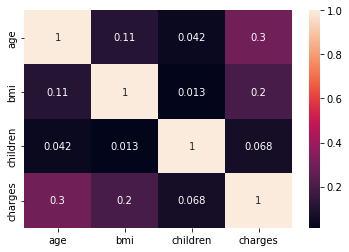

In [31]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

Langkah 5 - Pengujian Hipotesis

In [32]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
#Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

#inisiasi alpha
alpha = 0.05

#sampel 500 data
sample = df.sample(n=500, replace=True, random_state=1)

#sample smoker
sample_smoker = sample[sample['smoker'] == 'yes']
sample_smoker_charge = sample_smoker['charges'].to_numpy()

#sample non smoker
sample_nonsmoker = sample[sample['smoker'] == 'no']
sample_nonsmoker_charge = sample_nonsmoker['charges'].to_numpy()

stat, p = ttest_ind(a = sample_smoker_charge, b = sample_nonsmoker_charge, equal_var=False, alternative='less')
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 


#make descision
if p > alpha:
    print('Two group means are equal (Terima H0)') 
else:
    print('Two group means are different (Tolak H0)')

Statistics = 23.3430, p-value = 1.0000
Two group means are equal (Terima H0)


In [33]:
#Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25
#sample >25
sample_above25 = sample[sample['bmi'] > 25]
sample_above25_charge = sample_above25['charges'].to_numpy()

#sample <25
sample_below25 = sample[sample['bmi'] <= 25]
sample_below25_charge = sample_below25['charges'].to_numpy()

stat, p = ttest_ind(a = sample_above25_charge , b = sample_below25_charge, equal_var=False, alternative='less')
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 


#make descision
if p > alpha:
    print('Two group means are equal (Terima H0)') 
else:
    print('Two group means are different (Tolak H0)')

Statistics = 4.5521, p-value = 1.0000
Two group means are equal (Terima H0)


In [34]:
#Tagihan kesehatan laki-laki lebih besar dari perempuan
#sample laki-laki
sample_male = sample[sample['sex'] == 'male']
sample_male_charge = sample_male['charges'].to_numpy()

#sample perempuan
sample_female = sample[sample['sex'] == 'female']
sample_female_charge = sample_female['charges'].to_numpy()

stat, p = ttest_ind(a = sample_male_charge , b = sample_female_charge, equal_var=False, alternative='two-sided')
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 


#make descision
if p > alpha:
    print('Two group means are equal (Terima H0)') 
else:
    print('Two group means are different (Tolak H0)')

Statistics = 1.8420, p-value = 0.0661
Two group means are equal (Terima H0)
